In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Hitters.csv")
df = df.copy()
df.head()
#veri setimizde index problemi yok 


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
df.shape


(322, 20)

In [3]:
df.isnull().sum()
# salary değişkenlerimizde boş gözlemler bulunmaktadır 
# bunları ortalama ile dolduralım 


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df["Salary"].fillna(df.Salary.mean() , inplace = True)
# boş maaş değerlerini ortalama ile doldurduk aslında bunları ilerde tahmin ile dolduracağız

In [5]:
df.isnull().sum().any()
# datamızda boş değer var mı ? 


False

In [6]:
df.info()
# veri setimizdeki kategorik değişkenleri düzenliyelim 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       322 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


# Kategorik değişkenleri modellemeye hazır hale getirme 

In [7]:
from sklearn.preprocessing import LabelEncoder 
cat_list = ["NewLeague" , "Division" , "League"] 

lbe = LabelEncoder()
for i in cat_list:
    df[i] = lbe.fit_transform(df[i])

In [8]:
df.head(3)
# tip dönüşümlerini başarılı bir şekilde uyguladık 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,535.925882,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.000000,0


# Bagimli ve bağımsız değişken ayrışımı 

In [9]:
X = df.drop("Salary"  , axis = 1) # bagımsız degisken 

In [10]:
y = df["Salary"] #bagimli değisken 

# Veri setini Train_Test olarak ayırma

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# doğru parcalamışız

(257, 19)
(257,)
(65, 19)
(65,)


# Model Kurma


In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf_model = RandomForestRegressor(random_state = 11)

In [16]:
rf_model.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=11, verbose=0,
                      warm_start=False)

- n_estimators = fit edilicek ağaç sayısı !
- max-features = bolünme işlemlerinde göz önünde bulundurulacak olan değişken sayısı !
- min_samples_split (bolme karar yapısını etkileyen unsur ) = ağactaki minimum dallanmadaki minimum gözlem sayısı 
- min_samples_leaf = agaçtaki dallanmadan sonraki değişken ... (splitten farklıdır bunu araştır )
- max_deth = maksimum agaç derinliği 

In [17]:
y_pred = rf_model.predict(X_test)

In [18]:
np.sqrt( mean_squared_error(y_test , y_pred ))

385.02516811436465

# Model Tuning 

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 


In [20]:
rf = RandomForestRegressor(random_state = 11)
rf_params = {"n_estimators" : [100 ,200 ,500 ,1000 ,2000],
             "max_features" : (3 ,5 ,10 ,15),
             "max_depth" : list(range(1,10))}

In [21]:
rv_cv = GridSearchCV(rf,
                    rf_params,
                    cv = 10 ,
                    n_jobs = -1,
                    verbose = 2).fit(X_train ,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
rv_cv.best_params_

{'max_depth': 5, 'max_features': 3, 'n_estimators': 100}

# Final Modeli 

In [28]:
rf_tuned = RandomForestRegressor(max_depth = 5 ,
                                max_features = 3 , 
                                n_estimators = 100).fit(X_train ,y_train)

In [29]:
y_pred = rf_tuned.predict(X_test)

In [30]:
np.sqrt( mean_squared_error(y_test , y_pred) )

396.32551932850737

In [32]:
rf_tuned.feature_importances_
# değişkelerin katsayı değerleri

array([0.05816006, 0.06174819, 0.03061041, 0.05860727, 0.06934975,
       0.06697589, 0.02992184, 0.07874942, 0.09325682, 0.05521685,
       0.10353338, 0.12432954, 0.07977742, 0.0028903 , 0.01048987,
       0.04179902, 0.02086646, 0.01116402, 0.00255348])

In [33]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100} ,
                         index = X_train.columns)

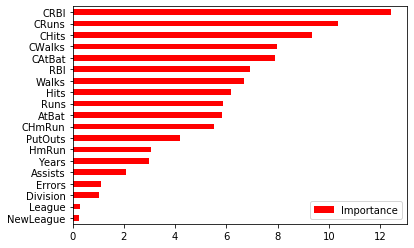

In [35]:
Importance.sort_values(by = "Importance" ,
                        axis = 0,
                      ascending= True).plot(kind = "barh" ,color = "red");